<a href="https://colab.research.google.com/github/AV-016/Formula1_telemetry-/blob/main/FormulaONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.9 MB/s eta 0:00:00


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
import os
if not os.path.exists('cache'):
    os.mkdir('cache')

In [14]:
session=fastf1.Cache.enable_cache("/content/cache")

In [16]:
session=fastf1.get_session(2023,'Silverstone','Q')
session.load()

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.8.1]
INFO:fastf1.fastf1.core:Loading data for British Grand Prix - Qualifying [v3.8.1]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
DEBUG:fastf1.ergast:Failed to parse timestamp '' in Ergastresponse.
req            INFO 	No cached data found for session_status_data. 

In [21]:
ver_lap=session.laps.pick_driver('VER').pick_fastest()
ham_lap=session.laps.pick_driver('HAM').pick_fastest()

/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3129: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3129: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [27]:
ver_tel=ver_lap.get_telemetry()
ham_tel=ham_lap.get_telemetry()


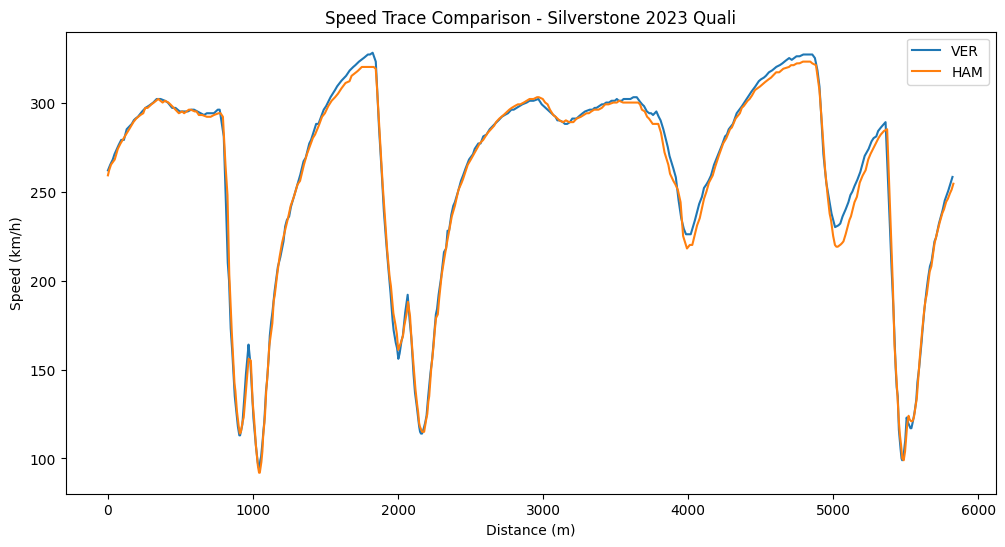

In [28]:
plt.figure(figsize=(12,6))
plt.plot(ver_tel['Distance'], ver_tel['Speed'], label='VER')
plt.plot(ham_tel['Distance'], ham_tel['Speed'], label='HAM')
plt.xlabel("Distance (m)")
plt.ylabel("Speed (km/h)")
plt.title("Speed Trace Comparison - Silverstone 2023 Quali")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/fastf1/utils.py:85: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


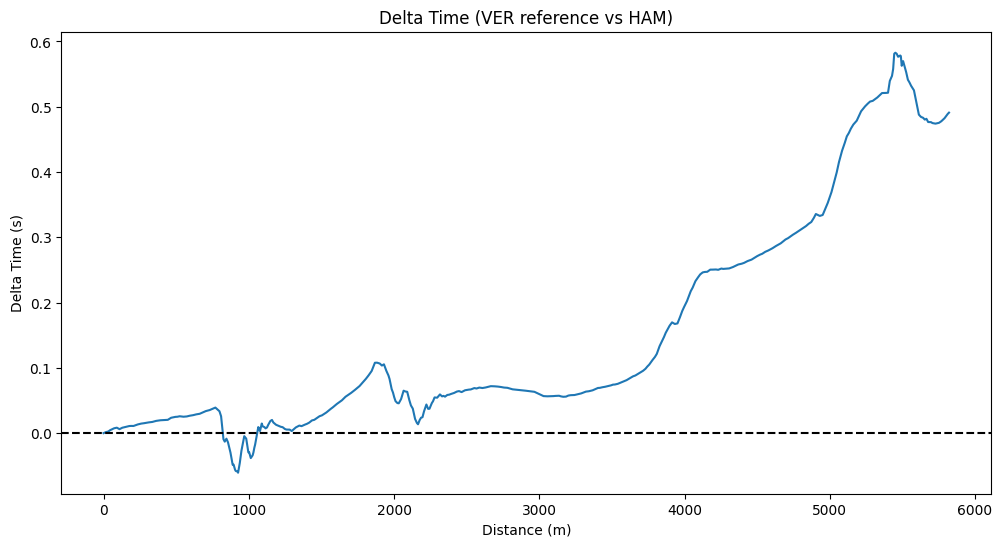

If delta > 0 → HAM slower. If delta < 0 → HAM faster


In [31]:
delta_time, ref_tel, compare_tel = fastf1.utils.delta_time(ver_lap, ham_lap)

plt.figure(figsize=(12,6))
plt.plot(ref_tel['Distance'], delta_time)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Distance (m)")
plt.ylabel("Delta Time (s)")
plt.title("Delta Time (VER reference vs HAM)")
plt.show()

print("If delta > 0 → HAM slower. If delta < 0 → HAM faster")